In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [2]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

Iteration 0, Loss: 19.57178412411187


In [3]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [4]:
res= ash(betahat, sebetahat)
print(res.pi) 

Iteration 0, Loss: 257.2105895887707
[6.22980058e-01 8.27546932e-13 8.93280688e-13 9.75556241e-13
 1.29129974e-12 2.28874320e-12 2.64019116e-01 1.13000826e-01
 0.00000000e+00 0.00000000e+00]


nice conservative behaviour

Text(0, 0.5, 'posterior mean')

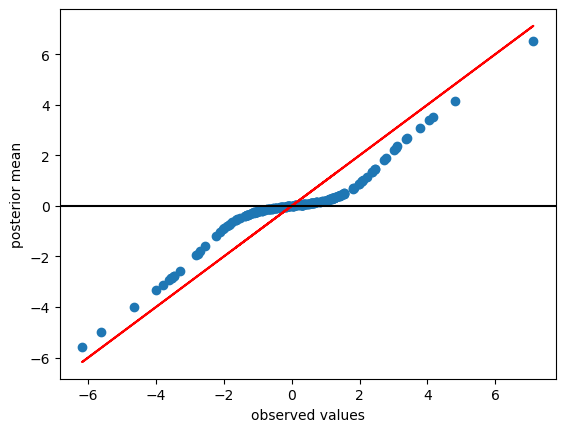

In [5]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [6]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

1.1073400896406196
0.8881686328052864


In [7]:
true_val1=  np.random.normal(loc=0, scale=2, size=1000)
true_val0=  np.zeros( 1000)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=1000)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=1000)

# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [8]:
res= ash(betahat, sebetahat)
print(res.pi) 

Iteration 0, Loss: 260.13832902353795
[5.43643103e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.56356897e-01 0.00000000e+00
 4.48889618e-11 1.28597931e-10]


in the large scale regime works well

Text(0, 0.5, 'posterior mean')

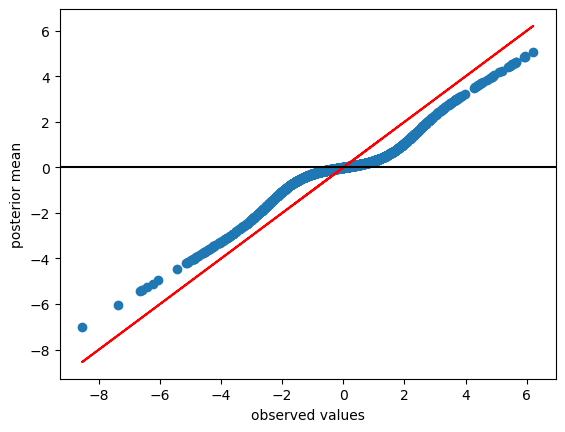

In [9]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

Text(0, 0.5, 'posterior mean')

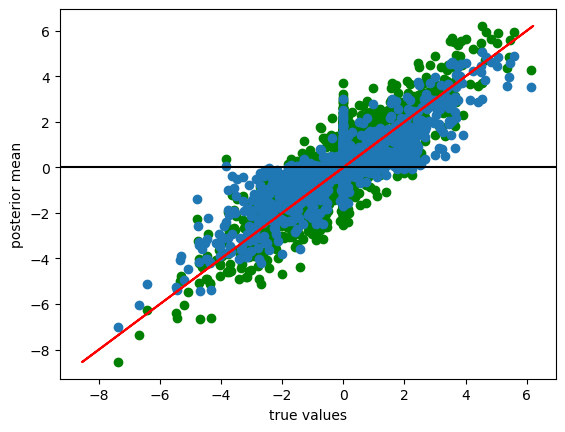

In [10]:
plt.scatter(np.concatenate((true_val1 , true_val0))    , betahat ,color="green" )
plt.scatter(np.concatenate((true_val1 , true_val0))    , res.post_mean  )
plt.xlabel("true values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [11]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

1.0132274560635437
0.7671343364104218
